Reference link for additional Learning :
https://www.youtube.com/watch?v=1qzrTvHGPow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
set(y)

{0, 1}

In [ ]:
data = pd.DataFrame(X, columns=['petal_length','petal_width'])
data['target'] = y
data.head()

,petal_length,petal_width,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


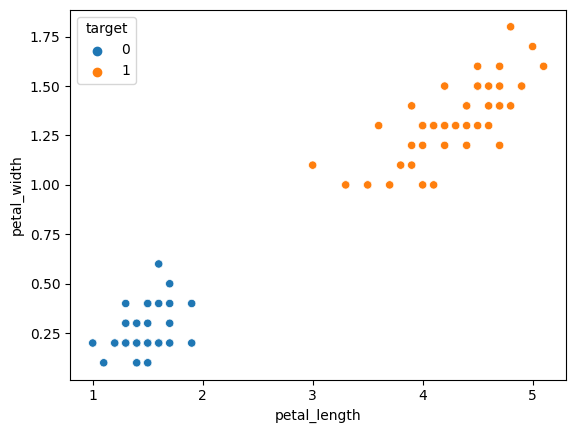

In [ ]:
import seaborn as sns
sns.scatterplot(x='petal_length',y='petal_width',hue='target',data=data)
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_linear = SVC(kernel='linear', C = 9999)
svm_linear.fit(X,y)

SVC(C=9999, kernel='linear')

In [ ]:
svm_linear.coef_ #coefficients

array([[1.29411744, 0.82352928]])

In [ ]:
svm_linear.intercept_

array([-3.78823471])

In [ ]:
svm_linear.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

In [ ]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x1 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x1 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA',label= "Support Vectors") #Highlight Support Vectors
    plt.plot(x1, decision_boundary, "k-", linewidth=2,label="Hyperplane")
    plt.plot(x1, gutter_up, "k--", linewidth=2 )
    plt.plot(x1, gutter_down, "k--", linewidth=2)
    plt.legend()

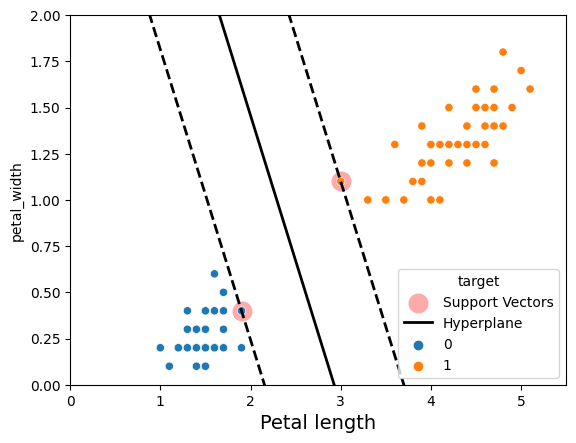

In [ ]:
plot_svc_decision_boundary(svm_linear, 0, 5.5)
sns.scatterplot(x='petal_length',y='petal_width',hue='target',data=data)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

# Remember -  Scaling is important

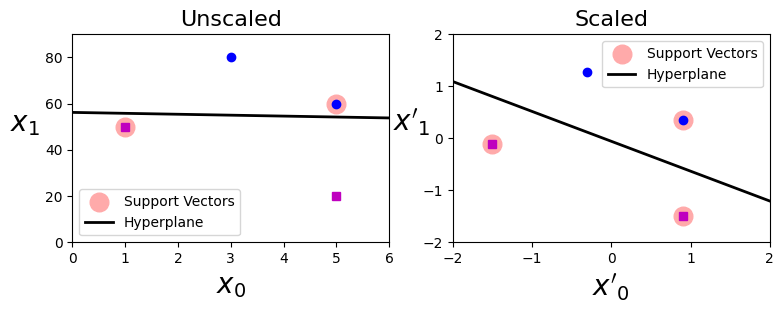

In [ ]:
#Why Scaling is important
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2]);

# Polynomial Kernel

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.arange(1,5).reshape(-1,1)
x

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
pf = PolynomialFeatures(degree=2)
pf.fit_transform(x)

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

In [ ]:
pf = PolynomialFeatures(degree=3)
pf.fit_transform(x)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [ ]:
x = np.arange(1,11).reshape(-1,2)
x

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [ ]:
pf = PolynomialFeatures(degree=2)
pf.fit_transform(x)

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

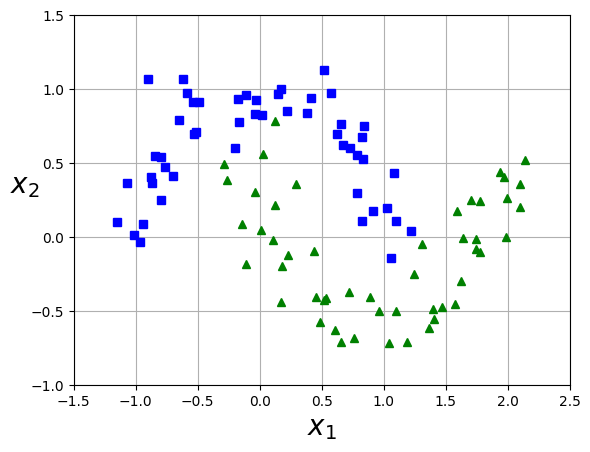

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=60)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
linear_svm = SVC(kernel='linear',C=99999)
linear_svm.fit(X,y)

data = pd.DataFrame(X, columns=['x1','x2'])
data['y'] = y

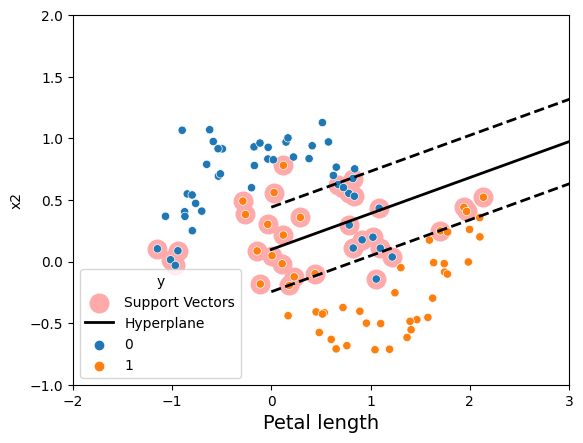

In [ ]:
plot_svc_decision_boundary(linear_svm, 0, 5.5)
sns.scatterplot(x='x1',y='x2',hue='y',data=data)
plt.xlabel("Petal length", fontsize=14)
plt.axis([-2, 3,-1, 2])

plt.show()

In [ ]:
pf = PolynomialFeatures(degree=3)
X_transform = pf.fit_transform(X)
X_transform.shape

(100, 10)

In [ ]:
X.shape

(100, 2)

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X_transform)

In [ ]:
svm_linear = SVC(C=999, kernel='linear')
svm_linear.fit(X_scaled,y)

SVC(C=999, kernel='linear')

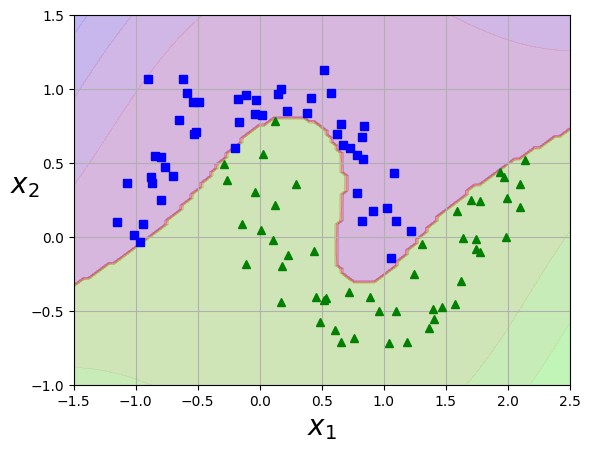

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    X  = pf.transform(X)
    X = ss.transform(X)
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(svm_linear, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
svm_poly = SVC(C=999, kernel='poly', degree=3)
svm_poly.fit(X,y)

SVC(C=999, kernel='poly')

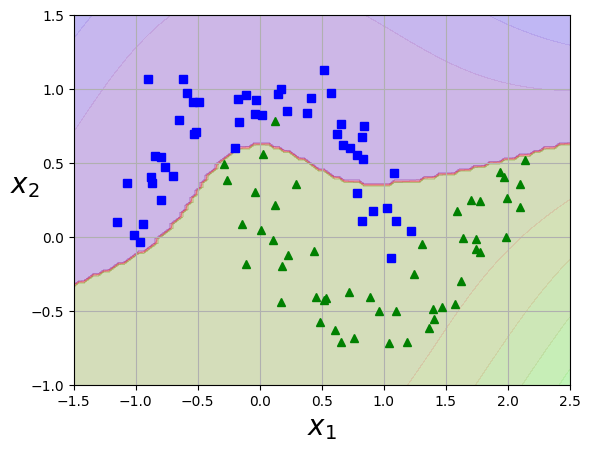

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    # X  = pf.transform(X)
    # X = ss.transform(X)
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(svm_poly, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
svm_rbf = SVC(C=999, kernel='rbf', degree=3)
svm_rbf.fit(X,y)

SVC(C=999)

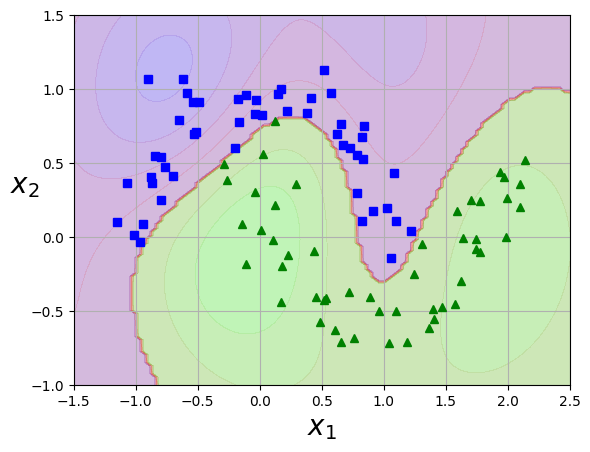

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    # X  = pf.transform(X)
    # X = ss.transform(X)
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(svm_rbf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# Sklearn pipeline
https://youtu.be/UjisZTLfcOI